In [ ]:
import numpy as np
from sympy import Matrix
from sympy import symbols
from sympy import lambdify
from sympy.solvers import solve

## Task 1: Golden ratio line search

In [ ]:
def gsSearch(f,x,d,eps=10e-10):
  ''' perform golden ratio search
      input:
        f - the function to be evaluated
        x - current iteration optimization variable
       
        d - direction to search =  (x_u - x_l)
        eps - small number that serves to terminate the search
      output:
        alpha - parameter to multiply by d to calculate the next x
        What do you need to do to begin the golden ratio line search?
  '''
  
#################################
# Start entering your code here #
#################################
tau = ((np.sqrt(5) + 1) / 2) -1
#Place holders the bounds upper and lower
#Need to figure out how to include the bounds for 
#Initializing the starting points for the GSS
x_u = x0[1]
x_l = x0[0]

#These are the points that come from using the upper and lower 
#Bounds to solve for the minimum of the function
d = x_u - (x_u - x_l) / tau
c = x_l + (x_u - x_l) / tau

# How does x_l and x_u need to be initialized?
while abs(d - c) > eps:
    if f(d) < f(c):
        x_u = c
    else:
        x_l = d
# How to define c and d as an initial variable, or x values
    d = x_u - (x_u - x_l) / tau
    c = x_l + (x_u - x_l) / tau
  

return (a + b) / 2

alpha = (a + b) / 2
#################################
# End of your code              #
#################################

return alpha

IndexError: ignored

def golden_search(xl,xu,mode,et):
    it=0
    e=1
    while e>=et:
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        fx1=func_fx(x1)
        fx2=func_fx(x2)
        label=check_pos(x1,x2)
        clear_output(wait=True)
        plot_graph(xl,xu,x1,x2) #PLOTTING
        plt.show()
        
        #SELECTING AND UPDATING BOUNDARY-INTERIOR POINTS
        if mode=='max':
            new_boundary=find_max(xl,xu,x1,x2,label)
        elif mode=='min':
            new_boundary=find_min(xl,xu,x1,x2,label)
        else:
            print('Please define min/max mode')
            break #exit if mode not min or max
        xl=new_boundary[0]
        xu=new_boundary[1]
        xopt=new_boundary[2]
        
        it+=1
        print ('Iteration: ',it)
        r=(np.sqrt(5)-1)/2 #GOLDEN RATIO
        e=((1-r)*(abs((xu-xl)/xopt)))*100 #Error
        print('Error:',e)
        time.sleep(1)

## Task 2: Steepest descent

In [16]:
def sd(f, x, der, eps=10e-10):
  ''' Steepest descent
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

  
#################################
# Start entering your code here #
#################################
  x_out = x
  max_itr = 1000
  alpha = 10**-7
  for i in range(max_itr):
      x_out = x - alpha * der(x)
      if np.linalg.norm(der(x)) < eps:
        return x_out, i+1
#################################
# End of your code              #
#################################
  return x_out

def gradient_descent(J_grad, x_init, alpha=0.01, epsilon=1e-10, max_iterations=1000):
    x = x_init
    for i in range(max_iterations):
        x = x - alpha * J_grad(x)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    return x, max_iterations

CONJUGATE GRADIENT

In [ ]:
def cg(f, x=0, der=0, eps=10e-5):
  ''' Conjugate gradient
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

#################################
# Start entering your code here #
#################################

  
#################################
# End of your code              #
#################################

  return x_out
def conjgrad(A, b, x):
    """
    A function to solve [A]{x} = {b} linear equation system with the 
    conjugate gradient method.
    More at: http://en.wikipedia.org/wiki/Conjugate_gradient_method
    ========== Parameters ==========
    A : matrix 
        A real symmetric positive definite matrix.
    b : vector
        The right hand side (RHS) vector of the system.
    x : vector
        The starting guess for the solution.
    """  
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(np.transpose(r), r)
    
    for i in range(len(b)):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(np.transpose(p), Ap)
        x = x + np.dot(alpha, p)
        r = r - np.dot(alpha, Ap)
        rsnew = np.dot(np.transpose(r), r)
        if np.sqrt(rsnew) < 1e-8:
            break
        p = r + (rsnew/rsold)*p
        rsold = rsnew
    return x

Task 4: Modified Newton Method


In [ ]:
def mn(f, x=0, der=0, hes=0, eps=10e-5):
  ''' Modified Newton Method
      input:
        f - objective function as a python function
        x - initial guess of the optimal solution
        der - analytical derivative of the objective function as a python function
        hes - analytical hessian of the objective function as a python function
        eps - small number to terminate the algorithm
      output:
        x_out - solution of x from all the iteration (not just the optimal value)
  '''

#################################
# Start entering your code here #
#################################
  x_out = x
  max_itr = 1000
  for i in range(0,max_itr):
      fxout = f(x_out)
      if abs(fxout) < eps:
          print('Solution found after',i,'iterations')
          return x_out
      dfxout = der(x_out)
      if dfxout == 0:
          print('This is a zero derivative so no solution was found')
          return None
      x_out = x_out - fxout/dfxout
  print('Exceeded max iterations and no solution was found')
  return None

  
#################################
# End of your code              #
#################################

  return x_out

## Test case 1: Quadratic function

In [17]:
#######################################
# Test case 1
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Objective function
def testFun(x):
  return x[0]**2+x[1]**2

# Derivative of the objective function
def testFunDer(x):
  return np.array([[2*x[0]], [2*x[1]]])

#######################################
# execution of your optimization code #
#######################################
x0 = np.array([-25., 75.])
x_out = sd(testFun,x0,testFunDer,0.00001)
print('Your code gives: ' + str(x_out[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(testFun, x0)
print('Scipy gives: ' + str(res.x))


Your code gives: [-25.000015  74.999985]
Scipy gives: [ 2.24916603e-07 -7.06466337e-07]


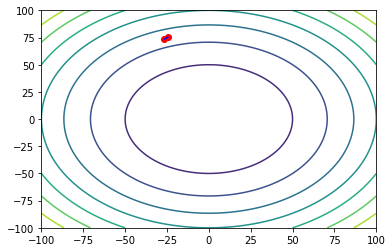

In [ ]:
#######################################
# Test case 1
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Plot the contour and the optimization iteration
import matplotlib.pyplot as plt

n = 1000 # calculate for n data points 
val_x = np.linspace(-100.,100., n)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

# Plot the contour map
plt.contour(optVar_x0, optVar_x1, testFun([optVar_x0, optVar_x1]))
# Scatter plot of the iteration of x
plt.scatter(x_out[:,0],x_out[:,1], c='r')
plt.plot(x_out[:,0],x_out[:,1], c='b')

plt.show()

## Test case 2: Box optimization

In [ ]:
#######################################
# Test case 2
# Do not modify this code
# You may run it to test your algorithm
#######################################

v_req = 10**6

from sympy import symbols
from sympy import lambdify
from sympy import Matrix

# Define optimization variables
a, b = symbols('a b')

# Define the objective to minimize
box  = a*b+2*v_req/b+2*v_req/a 
dBox = Matrix([box.diff(x) for x in [a,b]]) # Calculate gradient

# lambdify the objective function
boxF = lambdify([a,b], box)
dBoxF = lambdify([a,b], dBox)

# Wrapper functions
def boxFW (x):
  return boxF(x[0],x[1])

def dBoxFW (x):
  return dBoxF(x[0],x[1])

#######################################
# execution of your optimization code #
#######################################
x0 = np.array([60., 200.])
x_out = sd(boxFW,x0,dBoxFW,0.00001)
print('Your code gives: ' + str(x_out[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(boxFW, x0)
print('Scipy gives: ' + str(res.x))


Your code gives: [ 59.9 199.9]
Scipy gives: [125.99207898 125.99200824]


In [ ]:
#######################################
# Test case 2
# Do not modify this code
# You may run it to check your algorithm
#######################################

n = 1000 # calculate for n data points 
val_x = np.linspace(10., 220., 100)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

import matplotlib.pyplot as plt
# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# Plot the contour map to show objective landscape
plt.contour(optVar_x0, optVar_x1, boxFW([optVar_x0, optVar_x1]))
# Scatter plot of the iteration of x_star values
plt.scatter(x_out[:,0],x_out[:,1], c='r')
plt.plot(x_out[:,0],x_out[:,1], c='b')

plt.show()

## Test case 3: Wire optimization

In [ ]:
#######################################
# Test case 3
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Set all the parameters
y_start = 50; x_start = 50; x_end = 50; y_end = 350; a = 500; b = 400; t = 75

from sympy import symbols
from sympy import lambdify
from sympy import Matrix
# Define optimization variables
y1, y2 = symbols('y1 y2')

# Define the objective to minimize
length  = ((x_start-a)**2+(y_start-y1)**2)**0.5 + \
          ((y1-y2)**2+t**2)**0.5 + \
          ((a-x_end)**2+(y2-y_end)**2)**0.5

# Calculate gradient then cast to sympy matrix
dLength = Matrix([length.diff(x) for x in [y1,y2]]) 

# lambdify the objective function and the derivative
lengthF     = lambdify([y1,y2], length)
dLengthF     = lambdify([y1,y2], dLength)

# define wrapper functions
def lengthFW (x):
  return lengthF(x[0],x[1])

def dLengthFW (x):
  return dLengthF(x[0],x[1])


#######################################
# execution of your optimization code #
#######################################
x0 = np.array([20., 200.])
x_out = sd(lengthFW,x0,dLengthFW,0.00001)
print('Your code gives: ' + str(x_out[-1]))

# Check your code against scipy minimize
from scipy.optimize import minimize
res = minimize(lengthFW, x0)
print('Scipy gives: ' + str(res.x))

Your code gives: [ 19.99393151 199.99393151]
Scipy gives: [188.4599146  211.53729857]


In [ ]:
bestloss = float("inf") # Python assigns the highest possible float value
for num in range(1000):
  W = np.random.randn(10, 3073) * 0.0001 # generate random parameters
  loss = L(X_train, Y_train, W) # get the loss over the entire training set
  if loss < bestloss: # keep track of the best solution
    bestloss = loss
    bestW = W
  print ('in attempt %d the loss was %f, best %f' % (num, loss, bestloss))


NameError: ignored

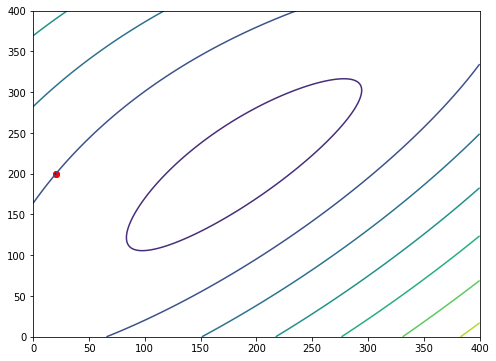

In [ ]:
#######################################
# Test case 3
# Do not modify this code
# You may run it to check your algorithm
#######################################

import matplotlib.pyplot as plt

# calculate for n data points 
n = 1000 
val_x = np.linspace(0., b, n)  

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x, val_x)

# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# plot contour to display objective landscape
plt.contour(optVar_x0, optVar_x1, lengthFW([optVar_x0, optVar_x1]))

# plot the iteration x_star values
plt.scatter(x_out[:,0],x_out[:,1], c='r')
plt.plot(x_out[:,0],x_out[:,1], c='b')

plt.show()

## Test case 4: Rosenbrock function


In [ ]:
#######################################
# Test case 4
# Do not modify this code
# You may run it to test your algorithm
#######################################

# Objective function
def rosen(x):
    """The Rosenbrock function"""
    a = 1
    b = 100
    return (a-x[0])**2+b*(x[1]-x[0]**2)**2

# Derivative of the objective function
def rosen_der(x):
    """The derivative of the Rosenbrock function"""
    a = 1
    b = 100
    return np.array([[-2*(a-x[0])+2*b*(x[1]-x[0]**2)*(-2*x[0])], [2*b*(x[1]-x[0]**2)]])

#######################################
# execution of your optimization code #
#######################################
x0 = np.array([-25., 300.])
x_out = sd(rosen,x0,rosen_der,0.0000001)
print('Your code gives: ' + str(x_out[-1]))

# Check your code against scipy optimize
from scipy.optimize import minimize
res = minimize(testFun, x0)
print('Scipy gives: ' + str(res.x))
print (x_out)

Your code gives: [625. 950.]
Scipy gives: [-1.99116201e-08 -2.53861406e-07]
[[32475.52 32800.52]
 [  625.     950.  ]]


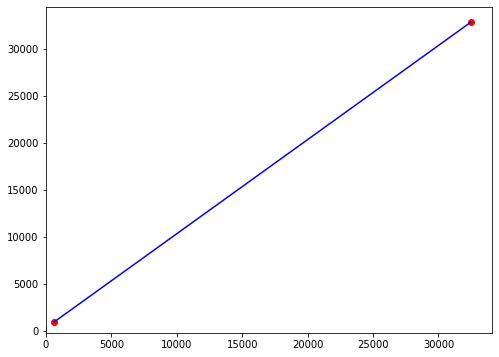

In [ ]:
#######################################
# Test case 4
# Do not modify this code
# You may run it to check your algorithm
#######################################

import matplotlib.pyplot as plt

# calculate for n data points 
n = 10

val_x0 = np.linspace(-20., 20., n)
val_x1 = np.linspace(-200., 400., n)

# meshgrid allows us to weave these two variables to arrive at n^2 points for calculation
optVar_x0, optVar_x1 = np.meshgrid(val_x0, val_x1)

# initialize a figure container
fig = plt.figure(figsize=(8, 6))

# plot contour to display objective landscape
plt.contour(optVar_x0, optVar_x1, rosen([optVar_x0, optVar_x1]))

# plot the iteration x_star values
plt.scatter(x_out[:,0],x_out[:,1], c='r')
plt.plot(x_out[:,0],x_out[:,1], c='b')

plt.show()